In [85]:
#import libraries
import numpy as np
import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [139]:
#read the dataset
data = pd.read_csv('final_data.csv')

In [140]:
len(data)

8008

In [141]:
#remove entries with NaN values for columns taken as features
data = data[data['publication_year'].notna()]
data = data[data['authors'].notna()]
data = data[data['num_pages'].notna()]
data = data[data['genre'].notna()]

In [142]:
len(data)

5347

In [143]:
#determine age of book as (2020 - publication_year)
data['age'] = [(2020 - int(x)) for x in data['publication_year']] 

In [144]:
#select columns title, authors, num_pages, age, genre, and average_rating as data
data = data[['authors', 'num_pages', 'age', 'genre', 'average_rating']]

#drop null values
data.dropna()

,authors,num_pages,age,genre,average_rating
0,"[{'author_id': '3041852', 'role': ''}]",162.0,14,history,4.13
1,"[{'author_id': '37778', 'role': ''}]",400.0,11,history,3.93
2,"[{'author_id': '137561', 'role': ''}]",288.0,14,history,3.98
4,"[{'author_id': '51229', 'role': ''}, {'author_...",332.0,8,history,4.28
6,"[{'author_id': '337108', 'role': ''}, {'author...",659.0,14,history,3.54
...,...,...,...,...,...
8000,"[{'author_id': '8108129', 'role': ''}]",270.0,6,young adult,3.84
8002,"[{'author_id': '614210', 'role': ''}]",199.0,6,young adult,3.79
8003,"[{'author_id': '11664', 'role': ''}]",208.0,7,young adult,4.10
8005,"[{'author_id': '2987125', 'role': ''}, {'autho...",288.0,7,young adult,4.15


In [146]:
#look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5347 entries, 0 to 8006
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         5347 non-null   object 
 1   num_pages       5347 non-null   float64
 2   age             5347 non-null   int64  
 3   genre           5347 non-null   object 
 4   average_rating  5347 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 250.6+ KB


In [44]:
#Anomaly detection

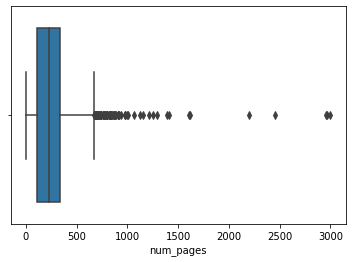

In [45]:
# find no. of pages outliers
# sns.boxplot(x=data['num_pages'])

In [147]:
# remove outliers from no. of pages 
data = data.drop(data.index[data['num_pages'] >= 1000])

In [148]:
len(data)

5331

In [48]:
#Feature Engineering
#Transforming textual features into numerical features

In [149]:
le = preprocessing.LabelEncoder()

In [150]:
#encode authors column
data['authors'] = le.fit_transform(data['authors'])

In [151]:
#encode genre column
data['genre'] = le.fit_transform(data['genre'])

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5331 entries, 0 to 8006
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   authors         5331 non-null   int32  
 1   num_pages       5331 non-null   float64
 2   age             5331 non-null   int64  
 3   genre           5331 non-null   int32  
 4   average_rating  5331 non-null   float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 208.2 KB


In [153]:
#One hot encoding for authors and genre
from sklearn.preprocessing import LabelBinarizer

max_value_authors = data['authors'].max()
max_value_genre = data['genre'].max()
authors_encoder = LabelBinarizer()
genre_encoder = LabelBinarizer()
authors_encoder.fit(data['authors'])
genre_encoder.fit(data['genre'])
transformed_authors = authors_encoder.transform(data['authors'])
transformed_genres = genre_encoder.transform(data['genre'])
onehot_authors_df = pd.DataFrame(transformed_authors)
onehot_genres_df = pd.DataFrame(transformed_genres)
data = pd.concat([data,onehot_authors_df,onehot_genres_df],axis=1).drop(['authors','genre'],axis=1)



In [154]:
# divide the data into attributes and labels
X = data.drop(['average_rating'], axis = 1)
y = data['average_rating']

In [155]:
# split 80% of the data to the training set and 20% of the data to test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 10)
X_train = torch.tensor(X_train.values).float()
X_test = torch.tensor(X_test.values).float()
y_train = torch.tensor(y_train.values).float()
y_train = torch.unsqueeze(y_train,1)
y_test = torch.tensor(y_test.values).float()
y_test = torch.unsqueeze(y_test,1)


In [171]:
# remove nan values for page number,age,authors
X_train_mask = X_train[:,0].eq(X_train[:,0]) # mask for nan values
X_train_mask = X_train_mask & X_train[:,1].eq(X_train[:,1]) # mask for nan values
X_train_mask = X_train_mask & X_train[:,2].eq(X_train[:,2]) # mask for nan values

X_test_mask = X_test[:,0].eq(X_test[:,0]) # mask for nan values
X_test_mask = X_test_mask & X_test[:,1].eq(X_test[:,1]) # mask for nan values
X_test_mask = X_test_mask & X_test[:,2].eq(X_test[:,2]) # mask for nan values

X_train = X_train[X_train_mask,:]
y_train = y_train[X_train_mask,:]
X_test = X_test[X_test_mask,:]
y_test = y_test[X_test_mask,:]

#normalize pages, age
pages_max = torch.max(X_train[:,0])
age_max = torch.max(X_train[:,1])
X_train[:,0] = X_train[:,0] / pages_max
X_train[:,1] = X_train[:,1] / age_max

X_test[:,0] = X_test[:,0] / pages_max
X_test[:,1] = X_test[:,1] / age_max
print(X_train)

tensor([[0.1311, 0.0085, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.2787, 0.0085, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.0287, 0.0030, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0410, 0.0050, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.3443, 0.0095, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.1639, 0.0140, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
predictions = lr.predict(X_test)

In [59]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': predictions.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,3.64,3.926094
1,4.24,3.944888
2,4.08,3.892507
3,4.21,3.871408
4,3.99,3.930625
5,3.90,3.935830
6,4.04,3.924351
7,4.32,3.883338
8,4.12,3.874602
9,4.17,3.855039


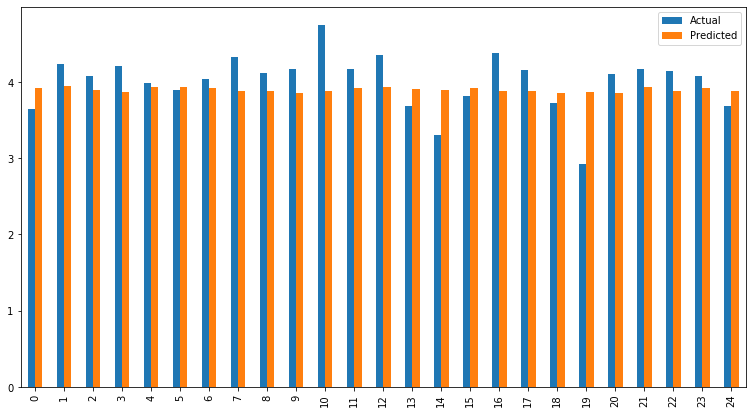

In [60]:
# visualise the above comparison result
pred.plot(kind='bar', figsize=(13, 7))

In [61]:
# evaluate the performance of the algorithm
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2776167878627979
MSE: 0.12774518548521124
RMSE: 0.35741458488037564


In [168]:
import torch
import torch.nn as nn


class SimpleNet(nn.Module):

  def __init__(self):

    super().__init__()

    self.loss_criterion = nn.MSELoss()
    
    self.fc_layers = nn.Sequential(
          nn.Linear(4395,300),
          nn.ReLU(),
          nn.Linear(300,100),
          nn.ReLU(),
          nn.Linear(100,1)
    )
    

  def forward(self, x: torch.tensor) -> torch.tensor:
    '''
    Perform the forward pass with the net

    '''
    model_output = self.fc_layers(x)
    return model_output


In [174]:
EPOCHS = 100

simpleNNmodel = SimpleNet()

for epoch in range(EPOCHS):
    optimizer = optim.SGD(simpleNNmodel.parameters(), lr=0.01)
    epoch_loss = 0
    
    simpleNNmodel.train()
    
    y_train_output = simpleNNmodel(X_train)
    y_test_output = simpleNNmodel(X_test)
    loss = simpleNNmodel.loss_criterion(y_train_output,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    validation_loss = simpleNNmodel.loss_criterion(y_test_output,y_test)
    print('Epoch {} Training Loss :{} Test Loss:{}'.format((epoch+1),loss,validation_loss))

Epoch 1 Training Loss :14.87890911102295 Test Loss:14.838125228881836
Epoch 2 Training Loss :14.133030891418457 Test Loss:14.093783378601074
Epoch 3 Training Loss :13.42531967163086 Test Loss:13.387672424316406
Epoch 4 Training Loss :12.747092247009277 Test Loss:12.710983276367188
Epoch 5 Training Loss :12.093786239624023 Test Loss:12.059233665466309
Epoch 6 Training Loss :11.463861465454102 Test Loss:11.430787086486816
Epoch 7 Training Loss :10.85459041595459 Test Loss:10.822893142700195
Epoch 8 Training Loss :10.263143539428711 Test Loss:10.232677459716797
Epoch 9 Training Loss :9.686277389526367 Test Loss:9.65700912475586
Epoch 10 Training Loss :9.121350288391113 Test Loss:9.093316078186035
Epoch 11 Training Loss :8.56667709350586 Test Loss:8.539867401123047
Epoch 12 Training Loss :8.021400451660156 Test Loss:7.995820999145508
Epoch 13 Training Loss :7.485214710235596 Test Loss:7.460879802703857
Epoch 14 Training Loss :6.958240985870361 Test Loss:6.935189247131348
Epoch 15 Training 